<a href="https://colab.research.google.com/github/haynapasi050505/supervised-machine-learning-regression-NYC-taxi-trip/blob/main/Copy_123of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
import seaborn as sns
import datetime
import seaborn as sns
sns.set()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir_path = '/content/drive/MyDrive/NYC Taxi Data.csv'

In [4]:
df = pd.read_csv(dir_path)

In [5]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
df


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
df.shape

(1458644, 11)

In [6]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [7]:
df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

In [8]:
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

In [9]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [10]:
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'])

In [11]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [12]:
df['pickup_day'].value_counts()

Friday       223521
Saturday     220855
Thursday     218566
Wednesday    210132
Tuesday      202745
Sunday       195352
Monday       187408
Name: pickup_day, dtype: int64

In [13]:
df['dropoff_day'].value_counts()

Friday       223020
Saturday     220888
Thursday     217738
Wednesday    209786
Tuesday      202513
Sunday       197210
Monday       187424
Name: dropoff_day, dtype: int64

In [14]:
def timezone(x):
  if x >= datetime.time(4,0,1) and x <= datetime.time(10,0,0):
    return 'morning'
  if x>= datetime.time(10,0,1) and x<= datetime.time(16 , 0, 0):
    return'midday'
  if x >= datetime.time(16,0,1) and x<= datetime.time(22,0,0):
    return'evening'
  elif x<= datetime.time(22,0,1) or x<= datetime.time(4,0,0):
    return 'late night'

In [15]:
df['pickup_timezone'] = df['pickup_datetime'].apply(lambda x:timezone(datetime.datetime.strptime(str(x) , "%Y-%m-%d %H:%M:%S").time()))

In [16]:
df['dropoff_timezone'] = df['dropoff_datetime'].apply(lambda x:timezone(datetime.datetime.strptime(str(x) , "%Y-%m-%d %H:%M:%S").time()))

In [17]:
df['pickup_hour']= df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

In [18]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


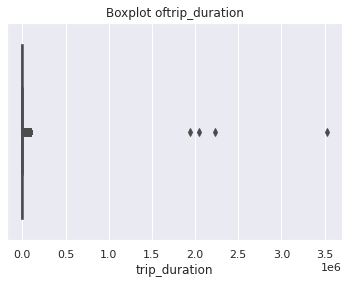

In [19]:
sns.boxplot(df['trip_duration'])
plt.title('Boxplot oftrip_duration')
plt.show()

In [20]:
df = df[df.trip_duration < 90000]  #you have to run this code 4 times

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


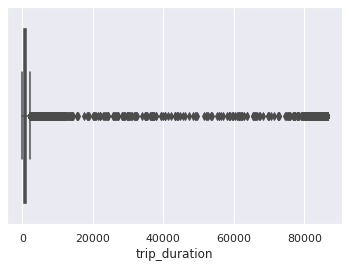

In [25]:
sns.boxplot(df['trip_duration'])

In [24]:
print(len(df[df.trip_duration == 0]))

0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


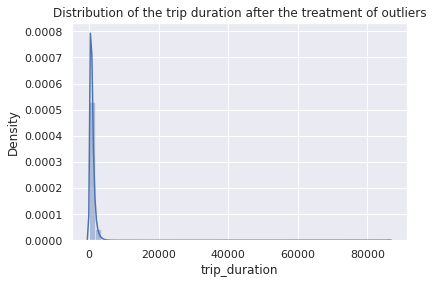

In [ ]:
sns.distplot(df['trip_duration'])
plt.title('Distribution of the trip duration after the treatment of outliers')
plt.show()


In [ ]:
bins = np.array([0,1800,3600,5400,7200,90000])
df['duration_time'] = pd.cut(df.trip_duration,bins,labels=["<5" , "5-10" , "10-15" , "15-20", ">20"])

In [ ]:
df.duration_time

0            <5
1            <5
2          5-10
3            <5
4            <5
           ... 
1458639      <5
1458640      <5
1458641      <5
1458642      <5
1458643      <5
Name: duration_time, Length: 1458575, dtype: category
Categories (5, object): ['<5' < '5-10' < '10-15' < '15-20' < '>20']

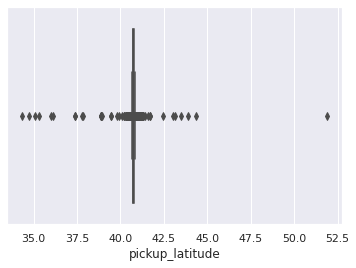

In [26]:
sns.boxplot(x=df['pickup_latitude'])
plt.show()

In [27]:
df = df[df.pickup_latitude < 42.5]
df = df[df.pickup_latitude > 40.0]
  #you have to run this code 4 times

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


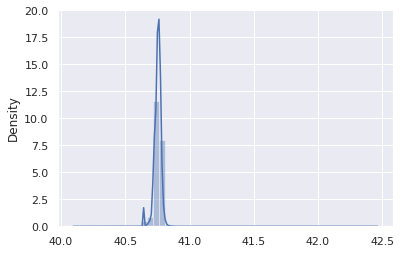

In [28]:
sns.distplot(x=df['pickup_latitude'])
plt.show()

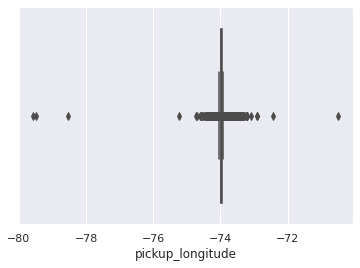

In [29]:
sns.boxplot(x=df['pickup_longitude'])
plt.show()

In [30]:
df = df[df.pickup_longitude < -73]
df = df[df.pickup_longitude > -75.3]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


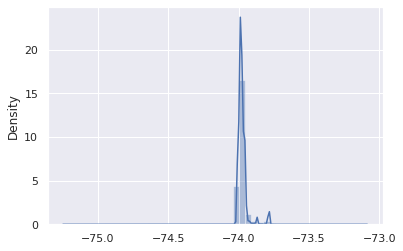

In [31]:
sns.distplot(x=df['pickup_longitude'])
plt.show()

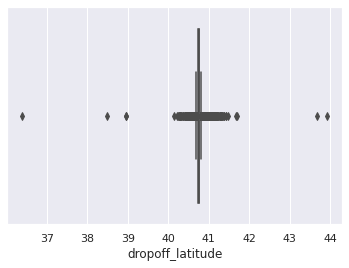

In [32]:
sns.boxplot(x=df['dropoff_latitude'])
plt.show()

In [33]:
df = df[df.dropoff_latitude < 42.5]
df = df[df.dropoff_latitude > 40.0]

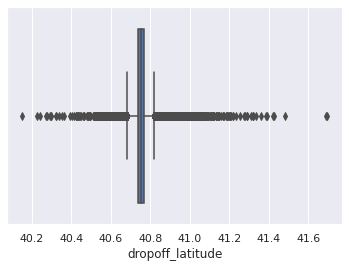

In [34]:
sns.boxplot(x=df['dropoff_latitude'])
plt.show()

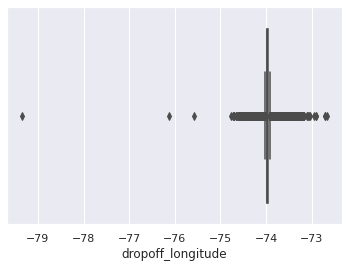

In [35]:
sns.boxplot(x=df['dropoff_longitude'])
plt.show()

In [36]:
df = df[df.dropoff_longitude > -75]  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


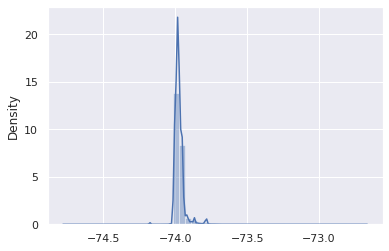

In [37]:
sns.distplot(x=df['dropoff_longitude'])
plt.show()

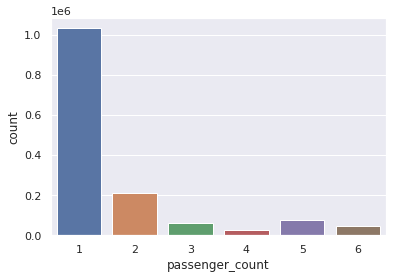

In [38]:
sns.countplot(x=df['passenger_count'] , data=df)
plt.show()

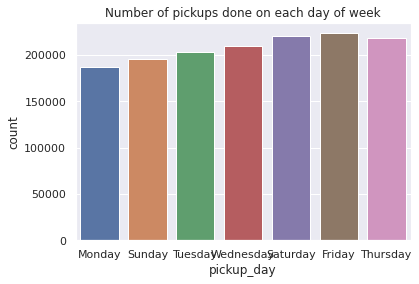

In [ ]:
sns.countplot(x=df['pickup_day'])
plt.title('Number of pickups done on each day of week')
plt.show()

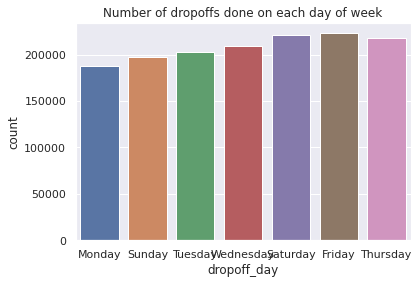

In [ ]:
sns.countplot(x=df['dropoff_day'])
plt.title('Number of dropoffs done on each day of week')
plt.show()

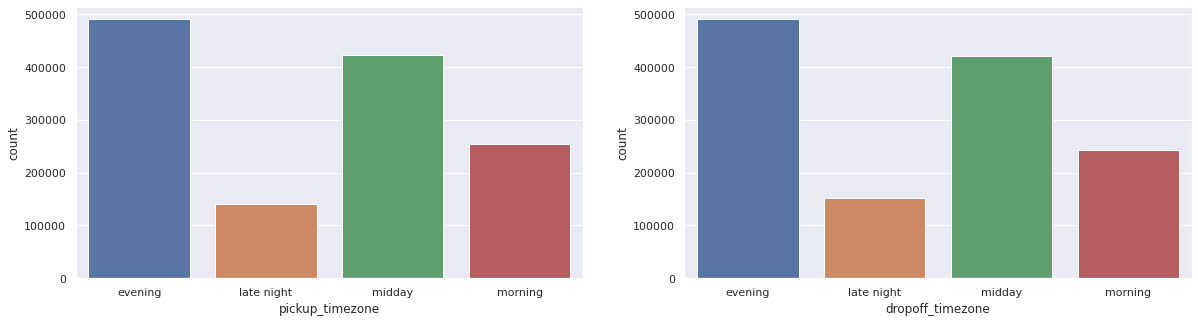

In [ ]:
figure, (ax1,ax2)=plt.subplots(ncols=2 , figsize=(20,5))
ax=sns.countplot(x='pickup_timezone' , data = df , ax= ax1)
ax=sns.countplot(x='dropoff_timezone' , data = df , ax= ax2)


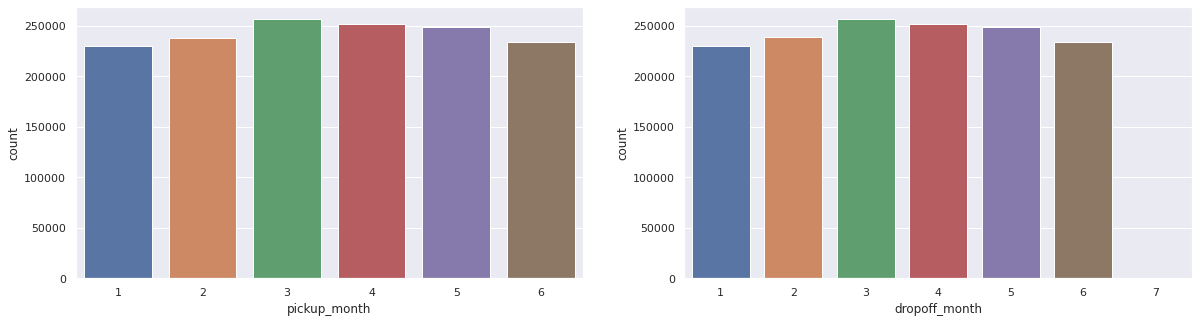

In [ ]:
figure, (ax1,ax2)=plt.subplots(ncols=2 , figsize=(20,5))
ax=sns.countplot(x='pickup_month' , data = df , ax= ax1)
ax=sns.countplot(x='dropoff_month' , data = df , ax= ax2)


Text(0.5, 1.0, 'Distribution plot of dropoff hours')

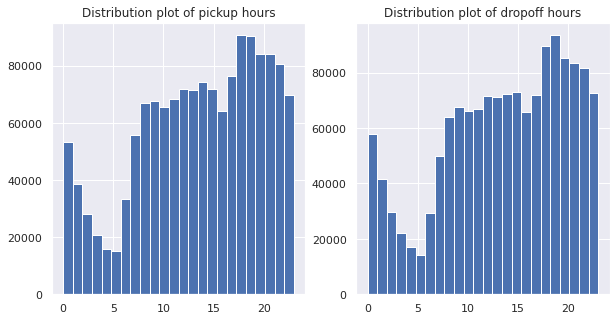

In [ ]:
figure,ax=plt.subplots(nrows=1 , ncols=2 , figsize = (10,5))
df.pickup_hour.hist(bins=24 , ax=ax[0])
ax[0].set_title('Distribution plot of pickup hours')
df.dropoff_hour.hist(bins=24 , ax= ax[1])
ax[1].set_title('Distribution plot of dropoff hours')

In [ ]:
df['store_and_fwd_flag'].value_counts()

N    1450533
Y       8042
Name: store_and_fwd_flag, dtype: int64

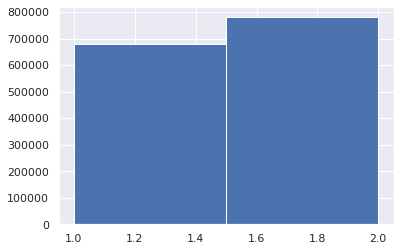

In [ ]:
df['vendor_id'].hist(bins=2)

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_timezone',
       'dropoff_timezone', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'duration_time'],
      dtype='object')

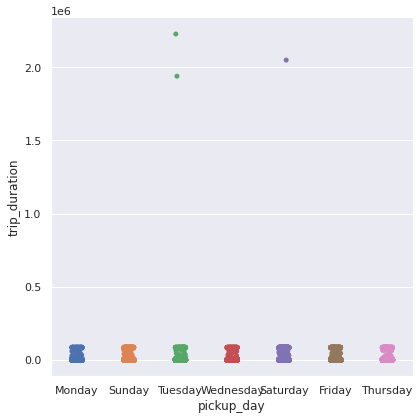

In [ ]:
sns.catplot(x='pickup_day' , y='trip_duration' , kind = "strip" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

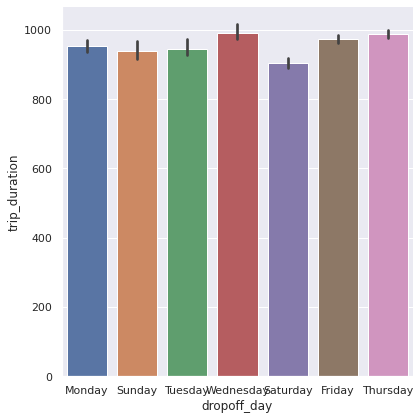

In [ ]:
sns.catplot(x='dropoff_day' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

Text(0.5, 1.0, 'The distribution of percentage of different duration of trips')

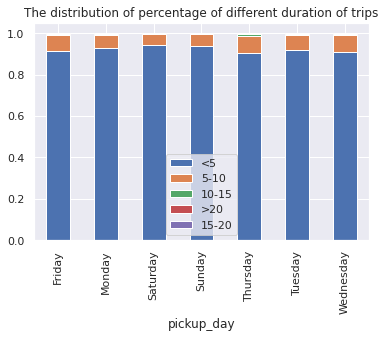

In [ ]:
ax1 = df.groupby('pickup_day')['duration_time'].value_counts(normalize = True).unstack()
ax1.plot(kind='bar' , stacked = True)
plt.title('The distribution of percentage of different duration of trips')

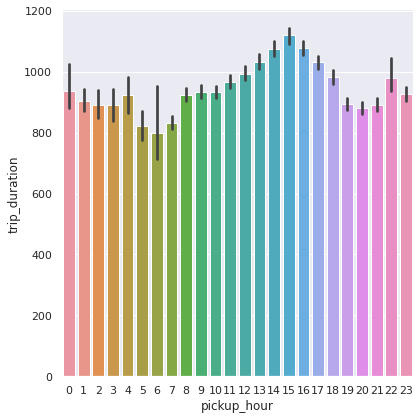

In [ ]:
sns.catplot(x='pickup_hour' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

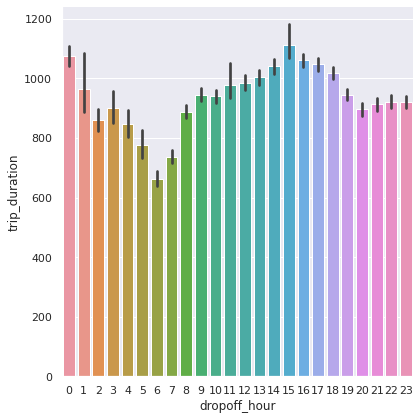

In [ ]:
sns.catplot(x='dropoff_hour' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


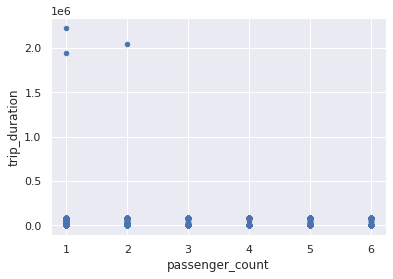

In [ ]:
df.plot.scatter( x= 'passenger_count', y='trip_duration' )

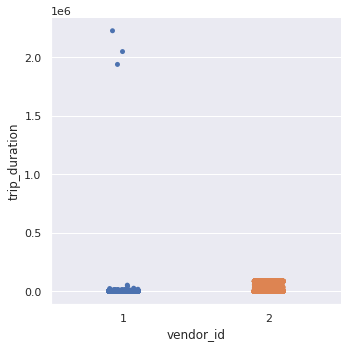

In [ ]:
sns.catplot(x='vendor_id' , y='trip_duration' , kind = "strip" ,  data = df )
plt.show()

In [ ]:
sns.catplot(x='store_and_fwd_flag' , y='trip_duration' , kind = "strip" ,  data = df )
plt.show()

In [ ]:
sns.catplot(y='trip_duration' , x='passenger_count' , data = df )

In [39]:
df['trip_duration_hour'] = df['trip_duration']/3600

In [40]:
from math import radians, cos, sin, asin, sqrt

def haversine(df):
  lat1 = df.pickup_latitude 
  lon1 = df.pickup_longitude 
  lat2 = df.dropoff_latitude
  lon2 = df.dropoff_longitude
  R = 3959.87433 
  #this is in miles. For earth radius inkilometers use 6372.8 km
  dLat = radians(lat2 - lat1)
  dLon = radians(lon2 - lon1)
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
  c = 2*asin(sqrt(a))
  return R*c


In [41]:
df['distance'] = df.apply(lambda x: haversine(x), axis = 1)

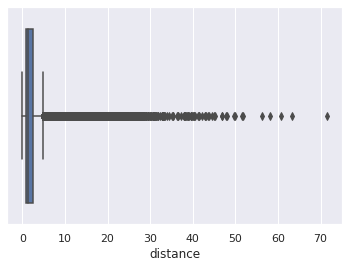

In [ ]:
sns.boxplot(x=df['distance'])
plt.show()

In [42]:
print(len(df[df.distance == 0]))

5868


In [43]:

df = df[df.distance < 45]

In [44]:
mean_dist = df['distance'].mean()
df.loc[df['distance']==0 , 'distance']=mean_dist

In [45]:
df['speed']=df['distance']/df['trip_duration_hour']

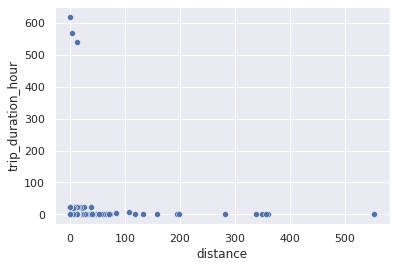

In [ ]:
sns.scatterplot(x='distance' , y = 'trip_duration_hour' , data = df)

In [46]:
print(len(df[df.distance == 0]))

0


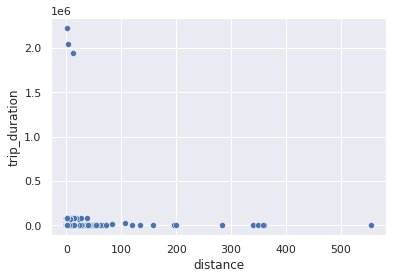

In [ ]:
sns.scatterplot(data=df , x='distance' , y='trip_duration')

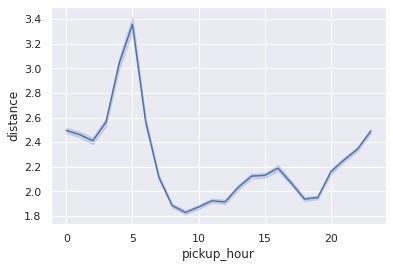

In [ ]:
sns.lineplot(x='pickup_hour' , y='distance' , data = df)

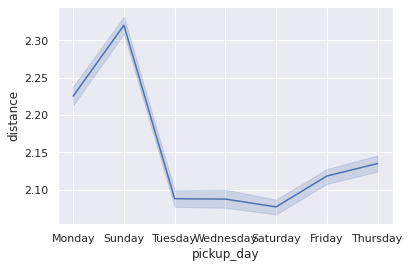

In [ ]:
sns.lineplot(x='pickup_day' , y='distance' , data = df)

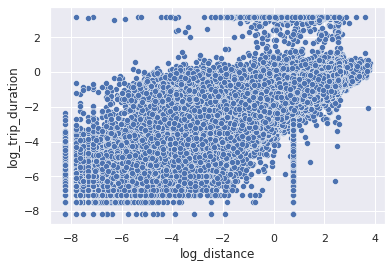

In [47]:
df['log_distance']=np.log(df.distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

In [48]:
df=df[df.log_trip_duration<2]

In [49]:
data2 = df.loc[:,['passenger_count' , 'store_and_fwd_flag' , 'trip_duration' , 'pickup_day' , 'dropoff_day' , 'pickup_month' , 'dropoff_month' , 'pickup_timezone' , 'dropoff_timezone' , 'speed' ,'log_distance' , 'distance']]

In [50]:
data2 = pd.get_dummies(data2 , columns=['store_and_fwd_flag','pickup_day' , 'dropoff_day' , 'pickup_month' , 'dropoff_month' , 'pickup_timezone' , 'dropoff_timezone'])

In [51]:
x = data2.drop(['trip_duration'] , axis=1)
y= data2['trip_duration']

In [52]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.20 , random_state = 7)

In [53]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train , y_train)

LinearRegression()

In [54]:
y_pred = ml.predict(x_test)
print(y_pred)

[518.02040896 395.03796151 801.20592648 ... 599.35220348 434.91999467
 427.02756217]


In [55]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.6309681091617684

Text(0, 0.5, 'Predicted')

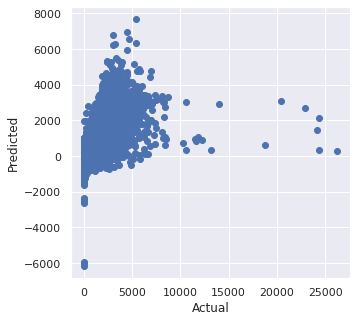

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [57]:
pred_y_df = pd.DataFrame({'Actual value' : y_test , 'Predicted value': y_pred , 'Differance': y_test-y_pred})
pred_y_df

,Actual value,Predicted value,Differance
944090,309,518.020409,-209.020409
461463,598,395.037962,202.962038
1180630,1095,801.205926,293.794074
617609,908,1143.831540,-235.831540
921074,672,966.838259,-294.838259
...,...,...,...
783310,251,459.310945,-208.310945
672321,1425,1350.336361,74.663639
263097,509,599.352203,-90.352203
533124,266,434.919995,-168.919995
